In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
sns.set(font=['TakaoPGothic'], font_scale=1.5)
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import norm, poisson, zipf

In [3]:
dat = {
    '正規分布': norm.rvs(size=100000, loc=30, scale=10),
    'ポアソン分布': poisson.rvs(size=100000, mu=5),
    'べき分布': zipf.rvs(size=100000, a=3.8),
}

In [4]:
dat = pd.DataFrame(dat)

(10.0, 100.0, 0.0, 1.0)

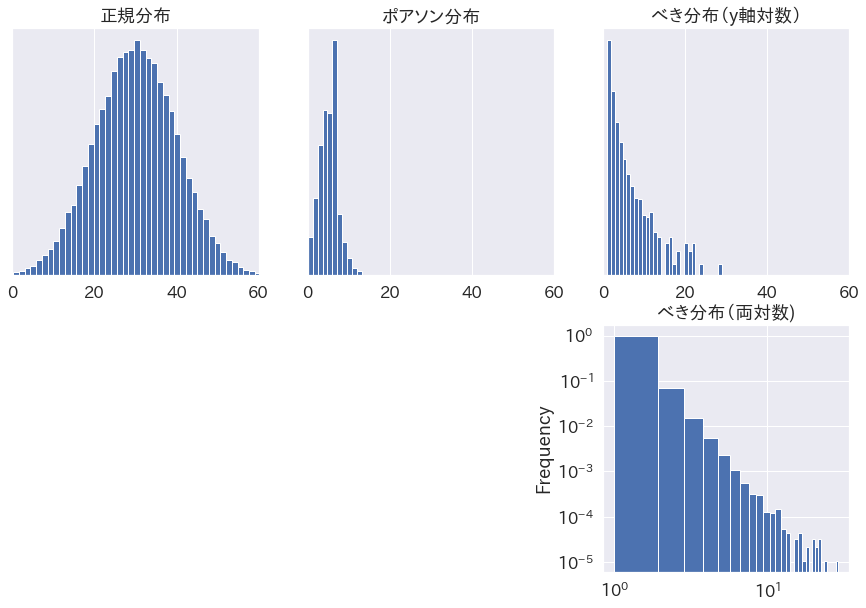

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
dat.loc[:, '正規分布'].plot(kind='hist', bins=60, density=True, ax=axes[0][0])
axes[0][0].set_xlim([0, 60])
axes[0][0].yaxis.set_visible(False)
axes[0][0].set_title('正規分布')
dat.loc[:, 'ポアソン分布'].plot(kind='hist', bins=15, density=True, ax=axes[0][1])
axes[0][1].set_xlim([0, 60])
axes[0][1].yaxis.set_visible(False)
axes[0][1].set_title('ポアソン分布')
dat.loc[:, 'べき分布'].plot(kind='hist', bins=30, density=True, logy=True, ax=axes[0][2])
axes[0][2].set_xlim([0, 60])
axes[0][2].yaxis.set_visible(False)
axes[0][2].set_title('べき分布（y軸対数）')
dat.loc[:, 'べき分布'].plot(kind='hist', bins=30, density=True, logx=True, logy=True, ax=axes[1][2])
axes[1][1].set_xlim([10, 100])
axes[1][2].set_title('べき分布（両対数)')
axes[1][0].axis('off')
axes[1][1].axis('off')

In [6]:
from numpy.random import multivariate_normal

dat = {
    '相関1': pd.DataFrame(multivariate_normal([30, 30], [[10, 9], [9, 10]], 100000)),
    '相関0': pd.DataFrame(multivariate_normal([30, 30], [[10, 0], [0, 10]], 100000)),
    '相関-1': pd.DataFrame(multivariate_normal([30, 30], [[10, -9], [-9, 10]], 100000)),
}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, '負の相関')

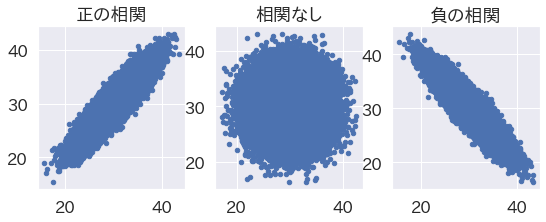

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
dat['相関1'].plot(kind='scatter', x=0, y=1, ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('正の相関')
dat['相関0'].plot(kind='scatter', x=0, y=1, ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('相関なし')
dat['相関-1'].plot(kind='scatter', x=0, y=1, ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_title('負の相関')

Text(0.5, 0.98, 'California Housing Prices')

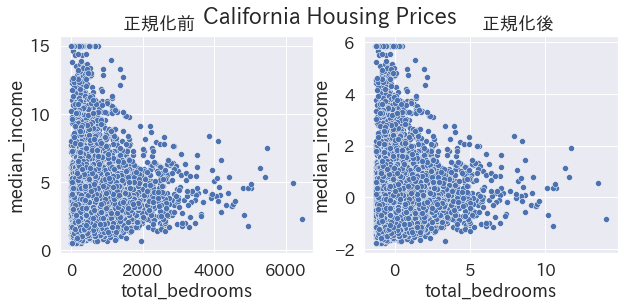

In [8]:
from sklearn.preprocessing import StandardScaler

cal = pd.read_csv('housing.csv')
cal = cal[['total_bedrooms', 'median_income']]
cal_norm = pd.DataFrame(
    StandardScaler().fit_transform(cal[['total_bedrooms', 'median_income']]),
    columns=['total_bedrooms', 'median_income']
)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(x=cal.total_bedrooms, y=cal.median_income, ax=axes[0])
axes[0].set_title('正規化前　　　')
sns.scatterplot(x=cal_norm.total_bedrooms, y=cal_norm.median_income, ax=axes[1])
axes[1].set_title('　　　正規化後')
fig.suptitle('California Housing Prices')